In [ ]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the file name
filename = list(uploaded.keys())[0]

# Load the Titanic dataset
titanic_df = pd.read_csv(filename)
titanic_df.head()

Saving train.csv to train (3).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Get an overview of the dataset
titanic_df.info()

# Check for missing values
titanic_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Filling missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Droping the Cabin column
titanic_df.drop(columns=['Cabin'], inplace=True)

# Filling missing Embarked values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Verify that there are no missing values left
titanic_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Summary statistics for numerical variables
numerical_summary = titanic_df.describe()

# Summary statistics for categorical variables
categorical_summary = titanic_df.describe(include=['object'])

numerical_summary, categorical_summary


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.361582    0.523008   
 std     257.353842    0.486592    0.836071   13.019697    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   22.000000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   35.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
                            Name   Sex  Ticket Embarked
 coun

In [ ]:
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)

Numerical Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Categorical Summary:
                            Name   Sex 

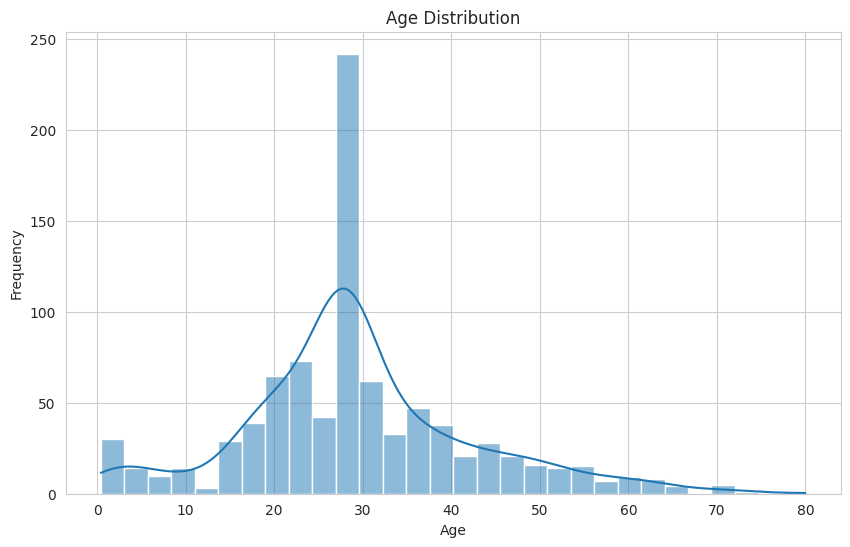

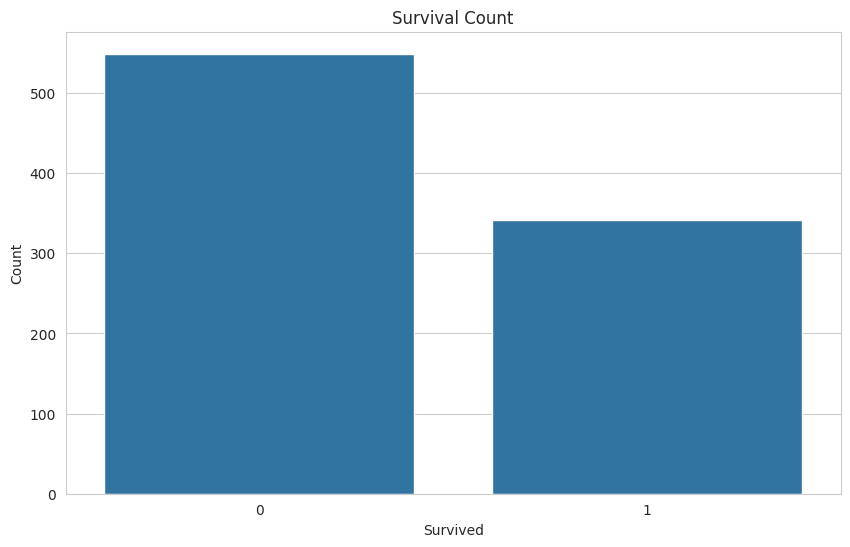

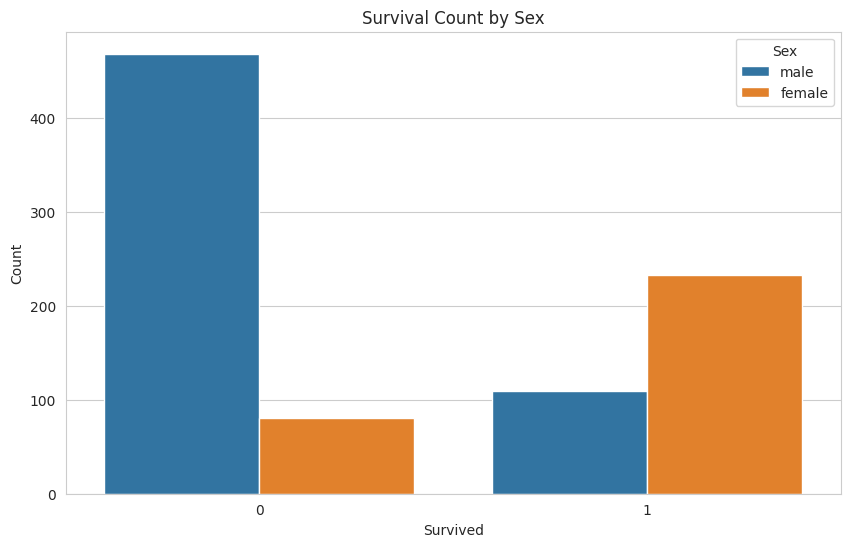

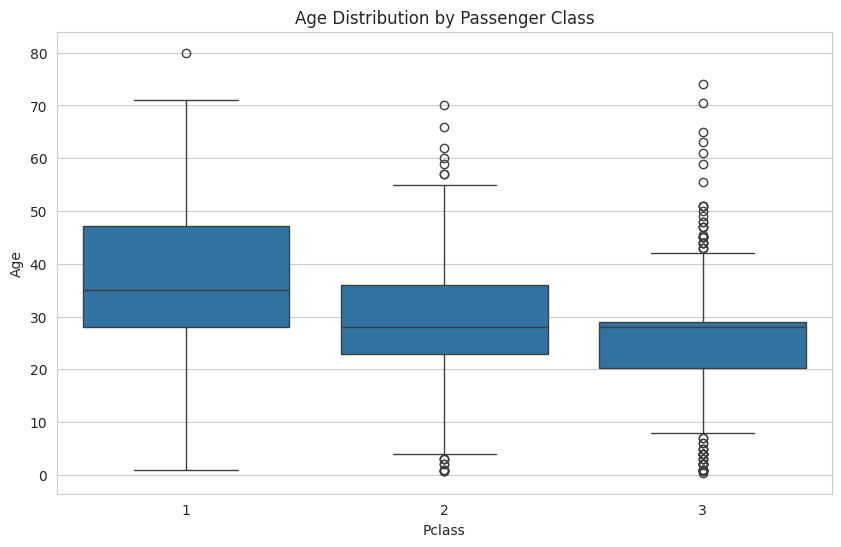

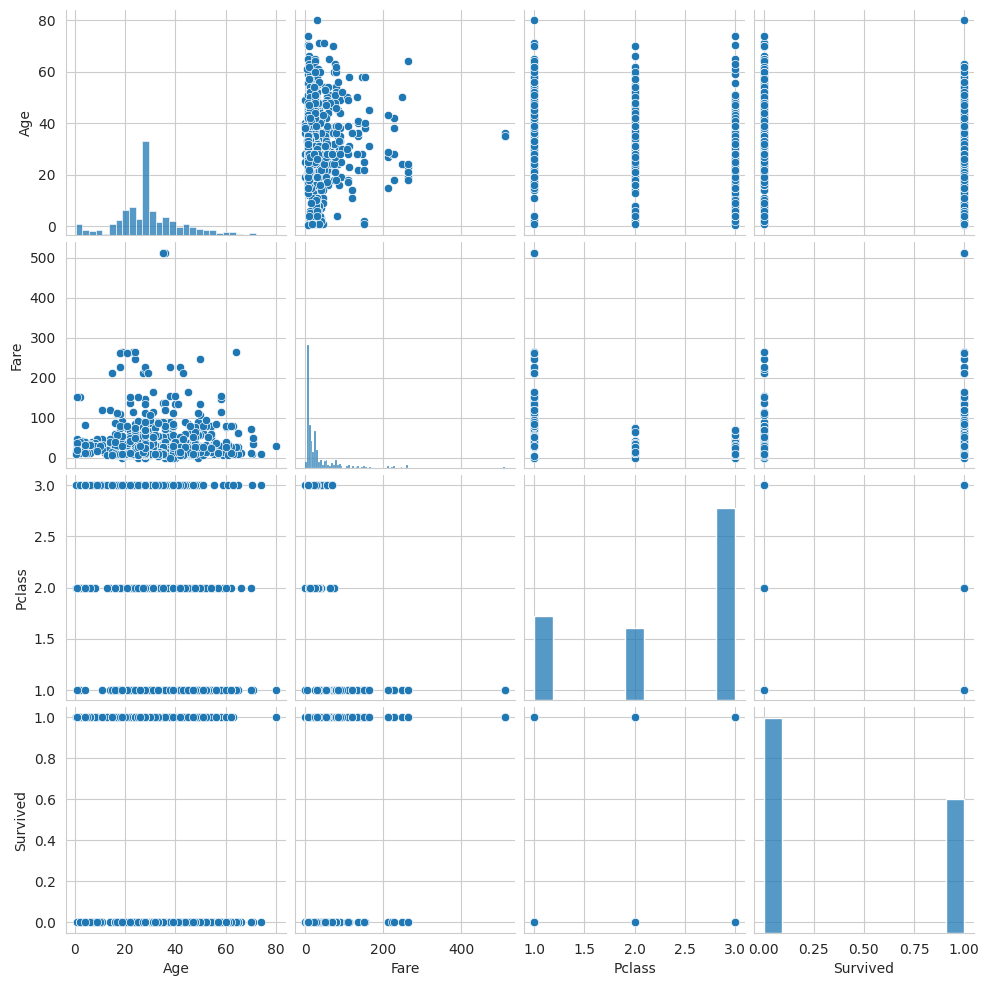

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plot of Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Count plot of Survived by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Box plot of Age by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Pairplot of numerical variables
sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()
